In [1]:
import os

base_path = './networks/STUNet_S1S2256'
# model = '2024_04_18-11_24_04_R50-ViT-B_16_lr0.01_bs8_img256_skip3_epo100'
model = '2024_04_25-15_32_54_R50-ViT-B_16_lr0.001_bs8_img256_skip3_epo20'

model_path = os.path.join(base_path, model)
log_path = os.path.join(model_path, 'log.txt')

with open(log_path, 'r') as f:
    content = f.readlines()
len(content)

215

In [2]:
import re
import numpy as np
train_avgs = []
val_avgs = []
for line in content:
    if 'train loss' in line or 'val loss' in line:
        elements = re.split(r'[\t ]', line)
        idx = elements.index('loss:')
        loss = elements[idx+1]
        try:
            avg = float(loss)
        except:
            print(line)
            avg = None
        if 'train loss' in line:
            train_avgs.append(avg)
        if 'val loss' in line:
            val_avgs.append(avg)

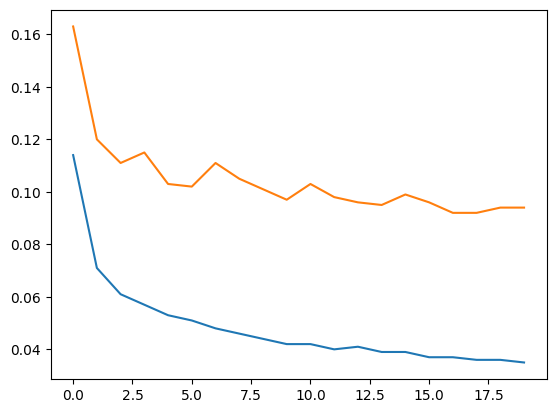

In [3]:
import matplotlib.pyplot as plt
plt.plot(train_avgs)
plt.plot(val_avgs)
plt.show()